In [235]:
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Bernoilli Distribution


**Definition**

A random variable with only two possible outcomes $X=\{0,1\}$ follows a **Bernoulli distribution** with success probabiity parameter $p$ and failure probability $1-p$.

---------------------------------------------------------------


### Bernoulli Probability (PMF)

Recall that **probability mass function** provides the probability of each element of the sample space. 

For a Bernoulli random variable, there are only two outcomes, from this, the probability mass function is

$$\boxed{P(X=x) = \begin{cases}
            &p &\  x=1\\
            &1-p &\ x=0\\
            &0 &\ Otherwise
            \end{cases}}
$$

This can be also written as the following:

$$\boxed{P(X=x) = p^x (1-p)^{1-x}}$$



### Bernoulli Expected Value

$$\begin{split}
E(X) &:= \sum_{x\in S} x P(X=x) \\
&= 0(1-p) + 1(p)\\
&= \boxed{p}
\end{split}
$$

### Bernoulli Variance

$$\begin{split}
V(X) &:= \sum_{x\in S}(x-\mu)^2 P(X=x)\\
&= (0-p)^2 (1-p) + (1-p)^2 p\\
&= pp(1-p) + p(1-p)(1-p)\\
&= p(1-p)(p+(1+p)\\
&= \boxed{p(1-p)}
\end{split}
$$

### Bernoulli CDF

The **cumulative distribution function** (CDF) is the function defined as $F(x) = P(X \leq x)$. For a Bernoulli variable, the CDF is

$$P(X \leq x) = \begin{cases}
                &1 &\ 1\leq x\\
                &1-p &\ 0\leq x < 1\\
                &0 &\ x<0
                \end{cases}    
$$

### Bernoilli Median

Recall the median depends on the distribution parameter, $p$, the rule to calculate the median is to start low and calculate the cumulative probability until the sum is at least $.5$.

$$\tilde{X} = \begin{cases}
              &0 &\ p< .5\\
              &[0, 1] &\ p=.5\\
              &1 &\ p>.5
              \end{cases}
$$

That is, with only 2 possible outcomes, i.e. $x = 0, 1$ 
- $\tilde{X}=1$ if the parameter $p < 0.5$
- $\tilde{X}=[0,1]$ if the parameter $p = 0.5$
- $\tilde{X}=[1]$ if the parameter $p > 0.5$


# Binomial Distribution

------------------------------------------------------------

### Definition

A **Binomial Random Variable (X)** counts the number of successes in $n$ **random independent** **Bernoulli trials**, each trail has only 2 possible outcomes such as **success** (with probability $p$) or **failure** (with probability $q = 1 − p$). 

The **Binomial distribution** is therefore denoted as:

<div style="background-color: blue; color: white; padding: 20px 20px 20px 20px">Let $X_i \sim Bern(p)$ and $Y = \sum_{i=1}^n X_i$, then $Y \sim Bin(n,p)$</div>

Note that
- **Bernoulli distribution** is a special case of **Binomial distribution** with size $n=1$; and
- **Binomial distribution** is the sum of $n$ **Bernoulli distribution**
 
--------------------------------------------------------------

A **Binomial random variable** needs to meet the following requirements:

1. The number of trials, $n$ is known;

2. each trial has two possible outcomes (Bernoulli);

3. the success probability $p$, is constant from trial to trial;

4. the trials are independent:
    - e.g. everytime after we flip a coin, we won't change the coin to something else that leads to the probability of getting Head or Tail changing, no matter how many flips $n$, the flips are all independent
    - another example is, we want to model the number of exactly 2 yellow balls out of 4 randomly selected balls from a pool where the proportion (probability) of yellow balls is $0.4$. Everytime we draw a ball, regardless of the color, we will return it to the pool so it might be drawn again. This way, the probability of getting a yellow ball from the pool remains constant.
    
5. the random variable is the number of successes with sample space defined as $S = \{0,1,..., n\}$


### Binomial Probability (PMF)

The [**probability mass function** (PMF)](https://en.wikipedia.org/wiki/Probability_mass_function) associated with the binomial distribution is as follows:

$$\boxed{P(X=k) = {n \choose k} p^k (1-p)^{n-k}}$$

The formula can be understood as follows: 
- $k$ successes occur with probability $p^k$ and 
- $n-k$ failures occur with probability $(1−p)^{n-k}$.
- However, the $k$ successes can occur anywhere among the $n$ trials, and there are ${n\choose k}$ different ways of having $k$ successes in a sequence of $n$ trials. Actually, this is also called the **bonimial coefficient**, pronounced as "**n choose x**": 

$${n \choose x} = C^n_x = \frac{n!}{x!(n-x)!}$$

#### All Possible Ways for Exactly $k$ Successes

Let's use the following example to understand the **binomial coefficient**, the number of unique combinations having exactly $k$ successes in $n$ trials. 

For example, we want to count how many ways of getting exactly 3 heads out of 5 tosses, that is $n=5$ and $k=3$.

1. Because after obtaining a head, we will have 1 less chance for another head to occur, so it's picked **without repetition**: 
    - For the 1st head ($H_1$), it could happen in any of the 5 tosses;
    - for the 2nd head ($H_2$), it could happen in any of the remaining 4 tosses;
    - for the 3rd head ($H_3$), it could happen in any of the remaining 3 tosses;
    - Combining the above, we have $5\times 4 \times 3$ possible arrangements. 


2. However, the above result has overlaps, for example, the following arragements have 3 heads in the same positions, they are differeent in the orders of getting the heads though. 

$$\underline{H_1}\ \underline{H_2}\ \underline{H_3}\ \underline{}\ \underline{}$$
$$\underline{H_1}\ \underline{H_3}\ \underline{H_2}\ \underline{}\ \underline{}$$
$$\underline{H_2}\ \underline{H_1}\ \underline{H_3}\ \underline{}\ \underline{}$$

As we don't care about the order of getting which head first, we need to remove the duplicates by dividing the result by the number of ways of arranging 3 heads in different order, which is $3!$. Therefore, the number of all possible ways of getting exactly 3 heads in 5 coin flips as follows:
$$\frac{5 \times 4 \times 3}{3!} = \frac{5!}{3!(5-3)!} $$
    
    
In summary, the above counting method is for the **combination without repetition**. 

$$\boxed{{n \choose x} = \frac{n!}{(n-x)!x!}}$$


### Binomial vs Hypergeometric

The **binomial distribution** is frequently used to model the number of successes in a sample of size $n$ drawn **with replacement** from a population of size $N$. If the sampling is carried out **without replacement**, the draws are **not independent** and so the resulting distribution is a **hypergeometric distribution**, not a **binomial one**, which will cause the **standard error** of the sample statistic overestimated. 
- We can use the **finite population correction (FPC) factor** $\sqrt{\frac{N-n}{N-1}}$ to adjust the overestimated **standard error**;
- However, for N much larger than n, general guideline is $\frac{n}{N} \leq 5\%$, the binomial distribution remains a good approximation, and is widely used.

More details is covered in the study note for "sampling distribution for proportion".

### Binomial Expected Value

-----
Remember a **Binomial Random Variable** is the sum of $n$ **Bernoulli trials** $B(p)$:

Let $X_i \sim B(p)$ and $Y = \sum_{i=1}^n X_i$, then $Y \sim Bin(n,p)$

-----

With this defintion, the expected value is

$$\begin{split}
E(Y) &= E(\sum_{i=1}^n X_i)\\
&= \sum_{i=1}^n E(X_i)\\
&= \sum_{i=1}^n p\\
&= \boxed{n\cdot p}
\end{split}$$

### Binomial Variance

We can do the same thing with variance

$$\begin{split}
V(Y) &= V(\sum_{i=1}^n X_i)\\
&= \sum_{i=1}^n V(X_i)\\
&= \sum_{i=1}^n p(1-p)\\
&= \boxed{n\cdot p(1-p)}
\end{split}$$

### Binomial CDF

The formula for the binomial cumulative probability function, $F(X) = P(X\leq x)$, is

$$\boxed{P(X \leq x) = \sum_{i=1}^x {n\choose i} p^i (1-p)^{x-i}}$$

Meanwhile, the probability of $P(X > x)$ is

$$\boxed{P(X > x) = 1 - P(X\leq x)}$$


For example, to calculate the probability of getting 3 or fewer heads in 10 flips of coin, $P(X \leq 3)$:

- $P(X \leq 3) = P(X=0) + P(X=1) + P(X=2) + P(X=3)$
- then we solve $P(X=0)$, $P(X=1)$, $P(X=2)$, $P(X=3)$ using **binomial pmf** formula respectively.

If we'd know the probability of getting at least 3 heads in 10 flips of coin instead: $P(X > 3) = 1 - P(X \leq 3)$



# Simulation of Binomial Distribution


First, let's simulate the probability histogram of obtaining 1 from rolling a fair dice, which success probability is theorectically $p=1/6$, and the failure probability is $1-p=5/6$. 

To simulate the theorectical probability (population), we need to run the experiment for many times to achieve closeness to the population distribution. 

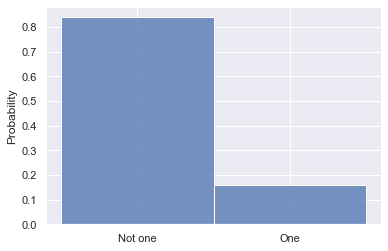

In [232]:
# Bernoulli distribution: probability of getting 1 from rolling a dice
n, p, k = 1, 1/6, 10000
rvs = np.random.binomial(n, p, k)
sns.histplot(rvs, discrete=True, stat='probability')
plt.xticks([0,1], ['Not one', 'One'])
plt.show()

Let's plot the probability distribution of obtaining "1" from rolling a fair dice 10 times, and then repeat this experiment for many times to simulate the population of the **Binomial distribution** $X\sim Bin(n=10, p=1/6)$

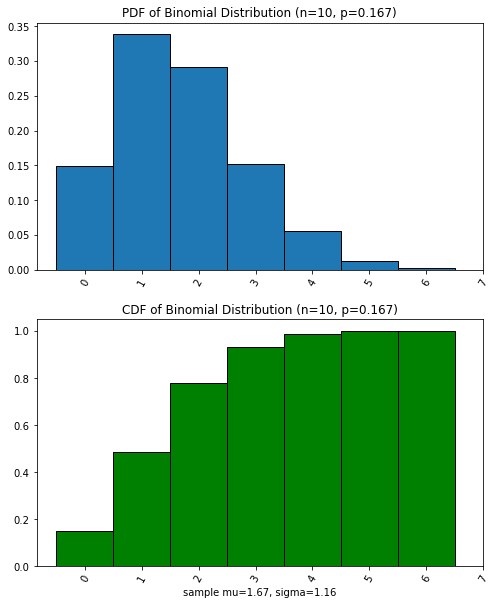

In [10]:
# Binomial distribution: probabilities of x numbers of 1s from rolling 10 dices
n = 10
tests = np.random.binomial(n, p, k)
fig, ax = plt.subplots(2, figsize=(8, 10))

# set up bins, edges and labels for xticks
# with the mean, sigma of the binomial distribution
# it's assumed that the minimum successful trial is 0
# and the maximum successful trial is mean + 5*sigma - that shall cover more than 99.99%, 
# as the probability of rolling six for a number outside of mean + 5 sigma is very very rare
mu, sigma = tests.mean(), tests.std()
bins = [x for x in range(0, m.ceil(mu+5*sigma))]
edges = [x+.5 for x in bins]
xtlabels = [str(x) for x in bins]

# plot the pdf of x 
# from x=0, i.e. getting 0 six,
# to 
ax[0].hist(tests, density=True, bins=bins, ec='black')
ax[0].set_xticks(edges)
ax[0].set_xticklabels(xtlabels, rotation=60)
ax[0].set_title(f'PDF of Binomial Distribution (n={n}, p={p:.3f})')

# plot the cdf of x
ax[1].hist(tests, density=True, bins=bins, cumulative = True, fc='green', ec='black')
ax[1].set_xticks(edges)
ax[1].set_xticklabels(xtlabels, rotation=60)
ax[1].set_title(f'CDF of Binomial Distribution (n={n}, p={p:.3f})')
ax[1].set_xlabel(f'''sample mu={mu:.2f}, sigma={sigma:.2f}''')


plt.show()

# Normal Approximation to Binomial

As shown above, With $p = 1/6$, the distribution of rolling $x$ number of six in 20 rolls isn't normal. However, with CLT applied, if we increase the number of samples $n$, we shall be able to have "the distribution of the sample mean" (which is a **sampling distribution**) approach a **normal distribution**.

The rule of thumb for using **Normal Approximation** for binomial is:

- Traditinally, both $np \geq 5$ and $n(1-p) \geq 5$ 
- In mordern textbooks, it's often required that both $np \geq 10$ and $n(1-p)\geq 10$


Let's visualize how **binomial distribution** with large enough $np$ and $n(1-p)$ will tend to **Normal distribution**:

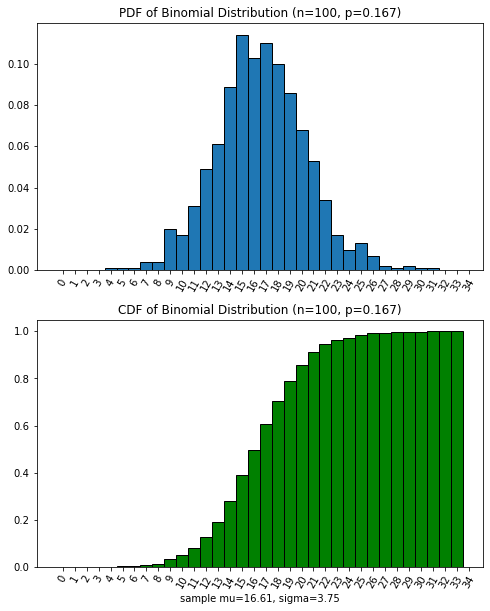

In [11]:
# increase n to 100 for the rolling dice example
n, p, k = 100, 1/6, 1000
tests = np.random.binomial(n,p,k)
fig, ax = plt.subplots(2, figsize=(8, 10))

# setting up bins, edges, labels
mu, sigma = tests.mean(), tests.std()
bins = [x for x in range(0, m.floor(mu+5*sigma))]
edges = [x+.5 for x in bins]
xtlabels = [str(x) for x in bins]

# plot the pdf of x 
ax[0].hist(tests, density=True, bins=bins, ec='black')
ax[0].set_xticks(edges)
ax[0].set_xticklabels(xtlabels, rotation=60)
ax[0].set_title(f'PDF of Binomial Distribution (n={n}, p={p:.3f})')

# plot the cdf of x
ax[1].hist(tests, density=True, bins=bins, cumulative = True, fc='green', ec='black')
ax[1].set_xticks(edges)
ax[1].set_xticklabels(xtlabels, rotation=60)
ax[1].set_title(f'CDF of Binomial Distribution (n={n}, p={p:.3f})')
ax[1].set_xlabel(f'''sample mu={mu:.2f}, sigma={sigma:.2f}''')

plt.show()

### Continuity Correction

A **continuity correction factor** is used when you use a continuous probability distribution to approximate a discrete probability distribution. Typically, when we do a normal approximation to a binomial distribution.


#### What is the problem?

For example, a population has 15% of people that smokes. Suppose we want to compute the probability of observing $49, 50 \text{ or } 51$ smokers in 400 randomly sampled people:
- The distribution of the number of smokers in 400 samples will be a binomial distribution and;
- $n=400, p=.15$;
- now, we'd solve the probability of $P(k=49, k=50\text{ or }k=51)$ 


Let's try solving the probability using:

##### 1. Binomial distribution $f(x)$ or $P(X=k)$ formula:

$$\begin{split}
&P(k=49, k=50, k=51)\\ 
&= P(49) + P(50) + P(51)\\
&= {400 \choose 49}.15^{49}(1-.15)^{400-49}+{400 \choose 50}.15^{50}(1-.15)^{400-50}+{400 \choose 51}.15^{51}(1-.15)^{400-51}\\
&\approx 0.0649
\end{split}
$$

In [52]:
def coef(n, k):
    return math.factorial(n)/(math.factorial(n-k)*math.factorial(k))

def binp(n,k,p):
    return coef(n,k)*p**k*(1-p)**(n-k)
    
round(binp(400, 49, .15)+binp(400, 50, .15)+binp(400, 51, .15), 4)

0.0649

##### 2. Normal approximation $F(x)$ or CDF formula:

The normal approximation has parameters corresponding to those of the binomial distribution:

- $\mu = np = 400\times .15 = 60$
- $\sigma = \sqrt{np(1-p)} = \sqrt{400\times .15(1-.15)}\approx 7.14$

Therefore, we can calculate Z scores of $X=49$ and $X=51$, and then calculate the CDF probabiility in between:

In [67]:
z_49 = (49-60)/7.14
z_51 = (51-60)/7.14
round(st.norm.cdf(z_51)-st.norm.cdf(x=z_49), 4)

0.042

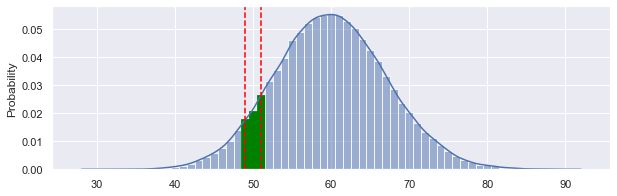

In [243]:
# Let's simulate the binomial distribution
rvs = np.random.binomial(400, .15, size=100000)

# Plot both binomial (the histogram) and the normal approximation to the curve (kde curve)
# to visualize the differece between areas of
# 1. the PMF of binomial bars where X=49, X=50 and X=51;
# 2. the cumulative probability between X=49 and X=51 under the normal curve
#==============================================================

fig = plt.figure(figsize=(10, 3))

# plot as discrete dist with 100 bins, the binwidth will be 1
ax = sns.histplot(rvs, bins=100, kde=True, discrete=True, stat='probability')

# shade the binomial probabilities of X=49, 50 or 51
patches = ax.patches
for p in patches:
    # because histogram bar x-axis  
    if p.get_x()+.5 in [49, 50, 51]:
        p.set_color('green')

# plot the lines to show the area between X=49 and X=51 under normal curve
ax.axvline(x=49, c='red', linestyle='--')
ax.axvline(x=51, c='red', linestyle='--')
plt.show()

#### Solution

It's observed that the original binomial probabilities (bars) are bigger than the normal approximation area. Actually the area under the curve is about 0.5 units slimer on both sides of the interval. 

- To adjust the difference, we can use **continuity correction factor**, which is around $0.5$. We should subtract $0.5$ from the left side of the discrete $x$ value and add $0.5$ to the right side of the discrete $x$ value, and then use the adjusted values to find the adjusted area under the normal curve. 



|Discrete|Continuous|
|:---|:---|
|$$P(X = c)$$|$$P(c-0.5 < X < c+0.5)$$|
|$$P(X \geq c)$$|$$P(X > c-0.5)$$|
|$$P(X \leq c)$$|$$P(X < c+0.5)$$|
|$$P(X < c)$$|$$P(X < c-0.5)$$|
|$$P(X > c)$$|$$P(X >c+0.5)$$|


- In the above example, we will adjust the following Z-scores with adjusted values:

In [239]:
z_49 = ((49-0.5)-60)/7.14
z_51 = ((51+0.5)-60)/7.14
st.norm.cdf(z_51)-st.norm.cdf(x=z_49)

0.06330100053290308

Now the adjusted area from **normal curve approximation** is almost the same as the original **binomial cumulative probability**.

# Multinomial Distribution

https://www.britannica.com/science/multinomial-distribution

A **multinomial distribution** involves a process that has a set of $k$ possible multually exclusive outcomes ($X_1, X_2, ...X_k$) with associated probabilities ($p_1, p_2...p_k$) such that $\sum p_i = 1$. 

Then, for $n$ repeated trials of the process, let $x_i$ indicates the number of times that the result $X_i$ occurs, which is subject to $0 \leq x_i \leq n$ and $\sum x_i = n$

With this notation, the joint PDF of **Multinomial Distribution** is given by:

$$P(X_1 = x_1, X_2 = x_2, ...X_k=x_k) = \frac{n!}{x_1!x_2!...x_k!} p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$




### Multinomial vs Binomial

- The **Multinomial distribution** is a generalization of the **Binomial distribution**, as it admits two or more than two outcomes. 
- Although processes involving multinomial distribution can be studied using the **Binomial dsitribution** by focusing on one outcome of interest and combining all of the other outcomes into one category (simplying the distribution to 2 outcomes), **Multinomial distribution** is more useful when all of the outcomes are of interest.

# References


https://stattrek.com/probability-distributions/binomial.aspx

http://www.stat.yale.edu/Courses/1997-98/101/binom.htm